# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Learning rates comparison
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202108

In [29]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import torch.nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-29-3b5e506b5206>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Create the data

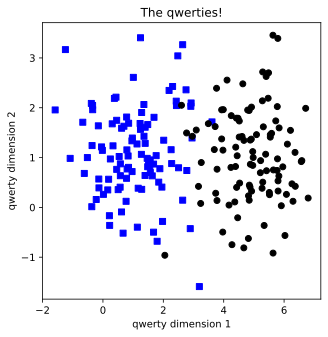

In [30]:
# parameters
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Functions to build and train the model

In [31]:
def createANNmodel(learningRate):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2,16),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(12,4),   # output unit
      nn.ReLU(),
      nn.Linear(4,2),
      nn.ReLU(),
      nn.Linear(20,1)
      #nn.Sigmoid(),    # final activation unit (not needed b/c we use BCEWithLogitsLoss)
        )

  # loss function
  lossfun = nn.BCEWithLogitsLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

  # model output
  return ANNclassify,lossfun,optimizer

In [32]:
# torch.manual_seed(10)
ran_net1,_,_2 = createANNmodel(0.1)
ran_net2,_,_2 = createANNmodel(0.1)
ran_net3,_,_2 = createANNmodel(0.1)
# ran_net3.named_parameters()
# nets = [ran_net3 ,ran_net2 ,ran_net1 ]
# for i in nets:
#   for p in nets.named_parameters: # в другом фаеле данной ошибки нет хз почему
#     if p[0] == 'weihgts':
ran_net3.named_parameters()

AttributeError: partially initialized module 'torch._dynamo' has no attribute 'config' (most likely due to a circular import)

In [ ]:
def createANNmodel():

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2,16),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(12,4),   # output unit
      nn.ReLU(),
      nn.Linear(4,2),
      nn.ReLU(),
      nn.Linear(20,1)
      #nn.Sigmoid(),    # final activation unit (not needed b/c we use BCEWithLogitsLoss)
        )


In [ ]:
# # a function that trains the model

# # a fixed parameter
# numepochs = 1000

# def trainTheModel(ANNmodel):

#   # initialize losses
#   losses = torch.zeros(numepochs)

#   # loop over epochs
#   for epochi in range(numepochs):

#     # forward pass
#     yHat = ANNmodel(data)

#     # compute loss
#     loss = lossfun(yHat,labels)
#     losses[epochi] = loss

#     # backprop
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()



#   # final forward pass
#   predictions = ANNmodel(data)

#   # compute the predictions and report accuracy
#   # NOTE: shouldn't it be predictions>.5??
#   totalacc = 100*torch.mean(((predictions>0) == labels).float())

#   return losses,predictions,totalacc

# Test the new code by running it once

In [ ]:
# # create everything
# ANNclassify,lossfun,optimizer = createANNmodel(.01)

# # run it
# losses,predictions,totalacc = trainTheModel(ANNclassify)

# # report accuracy
# print('Final accuracy: %g%%' %totalacc)


# # show the losses
# plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
# plt.xlabel('Epoch'), plt.ylabel('Loss')
# plt.show()

# Now for the experiment

In [ ]:
# # the set of learning rates to test
# learningrates = np.linspace(.001,.1,40)

# # initialize results output
# accByLR = []
# allLosses = np.zeros((len(learningrates),numepochs))


# # loop through learning rates
# for i,lr in enumerate(learningrates):

#   # create and run the model
#   ANNclassify,lossfun,optimizer = createANNmodel(lr)
#   losses,predictions,totalacc = trainTheModel(ANNclassify)

#   # store the results
#   accByLR.append(totalacc)
#   allLosses[i,:] = losses.detach()


In [ ]:
# # plot the results
# fig,ax = plt.subplots(1,2,figsize=(12,4))

# ax[0].plot(learningrates,accByLR,'s-')
# ax[0].set_xlabel('Learning rate')
# ax[0].set_ylabel('Accuracy')
# ax[0].set_title('Accuracy by learning rate')

# ax[1].plot(allLosses.T)
# ax[1].set_title('Losses by learning rate')
# ax[1].set_xlabel('Epoch number')
# ax[1].set_ylabel('Loss')
# plt.show()

In [ ]:
# proportion of runs where the model had at least 70% accuracy
# sum(torch.tensor(accByLR)>70)/len(accByLR)

# Run a meta-experiment to get more reliable results

In [ ]:
# # run a "meta-experiment" by repeating the experiment N times
# #  (different random weight initializations each time)
# # note: this cell takes ~7 mins.

# # number of times to iterate through the experiment
# numExps = 50

# # matrix to store all results
# accMeta = np.zeros((numExps,len(learningrates)))

# # fewer epochs to reduce computation time
# numepochs = 500

# # now for the experiment
# for expi in range(numExps):
#   for i,lr in enumerate(learningrates):

#     # create and run the model
#     ANNclassify,lossfun,optimizer = createANNmodel(lr)
#     losses,predictions,totalacc = trainTheModel(ANNclassify)

#     # store the results
#     accMeta[expi,i] = totalacc



# # now plot the results, averaged over experiments
# plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
# plt.xlabel('Learning rate')
# plt.ylabel('Accuracy')
# plt.title('Accuracy by learning rate')
# plt.show()

# Additional explorations

In [ ]:
# 1) The closeness of the qwerties groups is determined by the XY locations of the centroids, and by the blur parameter.
#    Try increasing or decreasing the blur (e.g., to 2 or .5). How does this affect the number of times that the model
#    successfully learned to categorize the two conditions?
#
# 2) The mean of a set of numbers is easily interpretable only if the data are roughly normally or uniformly distributed
#    (see lecture "Mean and variance" in Math section). Do you think the mean is a valid description of the performance
#    of the model's accuracy in the meta-experiment? Use a different metric (e.g., one we discussed in this video!) and
#    plot that result on the same graph as the average. You might need to do some normalization to get them in the same
#    range. Does this alternative method lead to a different conclusion?
#
# 3) Related to the previous comment, perhaps showing an image of the performance (variable accMeta) would be more
#    appropriate. Create a heat map that shows learning rate on the x-axis, experiment repetitions on the y-axis, and
#    the final accuracy in color. Label the axes and specify suitable color boundaries.
#